In [37]:
%matplotlib inline

import os                               # Manipulate operating system interfaces.

import numpy as np                      # Data wrangling.
import pandas as pd                     # Data handling.

import matplotlib.pyplot as plt         # Data visualization.
import plotly.express as px             # Data visualization
import plotly.graph_objects as go       # Data visualization
import seaborn as sns                   # Data visualization.
sns.set()

import pickle                           # Python object serialization.

from fer_dataset import FERDataset      # FER Dataset preprocessing and visualization

import warnings                   # Ignore all warnings.
warnings.filterwarnings("ignore")

# create an instance of FERDataset
fer_dataset = FERDataset()

root_folder = "/content/"
ds_file = "ckextended_processed.csv"

# print the FER dataset statistics and visualize
fer_dataset.print_ds_statistics(root_folder,ds_file)


df.shape = (2168, 3) 

Unique emotions =  [0, 1, 2, 3, 4, 5, 6] 

# of Unique emotions = 7 

emotion
6    514
4    279
3    279
5    277
0    277
1    272
2    270
Name: count, dtype: int64 

Unique Usage = ['PrivateTest', 'PublicTest', 'Training'] 

# of Unique Usage = 3 

Usage
Training       1055
PrivateTest     568
PublicTest      545
Name: count, dtype: int64 

0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

Emotion Counts:
emotion
6    514
4    279
3    279
5    277
0    277
1    272
2    270
Name: count, dtype: int64

Data Imbalance Statistics (Percentage):
emotion
6    23.71
4    12.87
3    12.87
5    12.78
0    12.78
1    12.55
2    12.45
Name: count, dtype: float64


In [15]:
# Set the name of the final preprocessed dataset file for VGG
vgg_ds_processed_file = "ckextended_processed.csv"

# Preprocess the dataset for VGG model
# Adjust image size to 224x224 as VGG typically expects this input size
vgg_ck_df, vgg_ds_processed_file_path = fer_dataset.preprocess(
    root_folder,
    ds_file,
    vgg_ds_processed_file,
    224,  # VGG typically uses 224x224 input size
    224

)

# Display the processed dataframe
vgg_ck_df

6
262
Oversampled dataset saved to /content/ckextended_processed.csv


,emotion,pixels,Usage
0,6,64 61 12 30 5 22 20 39 3 19 2 0 8 17 25 71 17 ...,PublicTest
1,2,50 53 37 2 2 4 3 1 7 15 10 8 47 57 72 19 28 37...,Training
2,6,104 44 40 41 39 30 28 25 25 21 15 16 24 38 72 ...,PrivateTest
3,6,50 41 46 37 13 21 16 15 6 17 8 12 49 57 76 116...,PublicTest
4,6,11 7 6 2 7 7 0 0 0 6 20 45 62 91 117 134 148 1...,PublicTest
...,...,...,...
2163,6,72 72 65 70 58 48 23 21 17 28 42 34 50 82 108 ...,PrivateTest
2164,6,43 42 35 43 75 111 99 100 123 137 148 172 179 ...,PrivateTest
2165,6,45 45 51 47 6 0 1 0 0 0 0 0 6 17 20 11 32 56 6...,PrivateTest
2166,1,11 29 31 29 33 46 45 34 121 95 158 171 163 166...,PublicTest


0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral



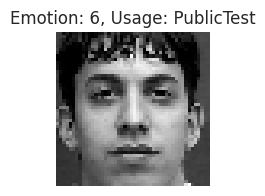

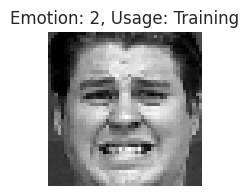

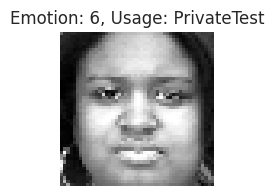

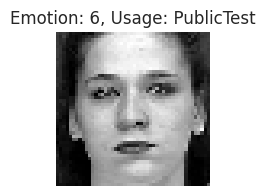

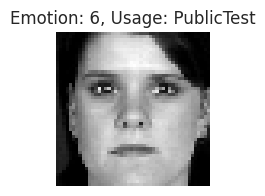

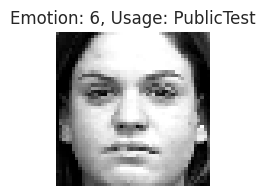

In [30]:
# visualize some sample images in the resampled dataset
fer_dataset.visualize_image_data(vgg_ck_df,5)

In [36]:
# Import the CustomVGG class from the vgg_fer.py file
from vgg_fer import CustomVGG

# Create an instance of CustomVGG model (VGG FER)
cust_vgg_fer = CustomVGG(img_height=48, img_width=48, num_classes=7)

# Create and compile the model
model = cust_vgg_fer.create_and_compile_model()

X_train, X_test, y_train, y_test = cust_vgg_fer.preprocess_data(vgg_ck_df)

# Train the model
X_test, y_test, history = cust_vgg_fer.train_model(vgg_ck_df, batch_size=32, epochs=20, validation_split=0.2)

# evaluate the model after training
loss, accuracy = cust_vgg_fer.evaluate_model(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.1672 - loss: 2.2618 - val_accuracy: 0.2075 - val_loss: 1.9038
Epoch 2/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.1860 - loss: 2.0568 - val_accuracy: 0.2709 - val_loss: 1.8156
Epoch 3/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 88s 1s/step - accuracy: 0.2343 - loss: 1.9419 - val_accuracy: 0.2939 - val_loss: 1.7627
Epoch 4/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.2400 - loss: 1.8760 - val_accuracy: 0.3199 - val_loss: 1.7132
Epoch 5/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.3099 - loss: 1.7795 - val_accuracy: 0.3487 - val_loss: 1.6613
Epoch 6/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.2951 - loss: 1.7888 - val_accuracy: 0.3862 - val_loss: 1.6144
Epoch 7/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.3146 - loss: 1.7117 - val_accuracy: 0.4179 - val_loss: 1.5712
Epoch 8/20
44/44 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3427 - loss: 1.6511 - val_accuracy: 0.4438 - val_loss:

In [38]:
# Evaluate the Custom VGG model
y_pred = cust_vgg_fer.evaluate_model(X_test, y_test)

Test loss: 1.2923
Test accuracy: 0.5876


In [45]:
# Check the type and contents of y_pred
print("Type of y_pred:", type(y_pred))
print("Contents of y_pred:", y_pred)

Type of y_pred: <class 'float'>
Contents of y_pred: 1.292311191558838


In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)



14/14 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step


In [54]:
# print f1 score

from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print('F1 Score: ', f1)


F1 Score:  0.04679275427562821


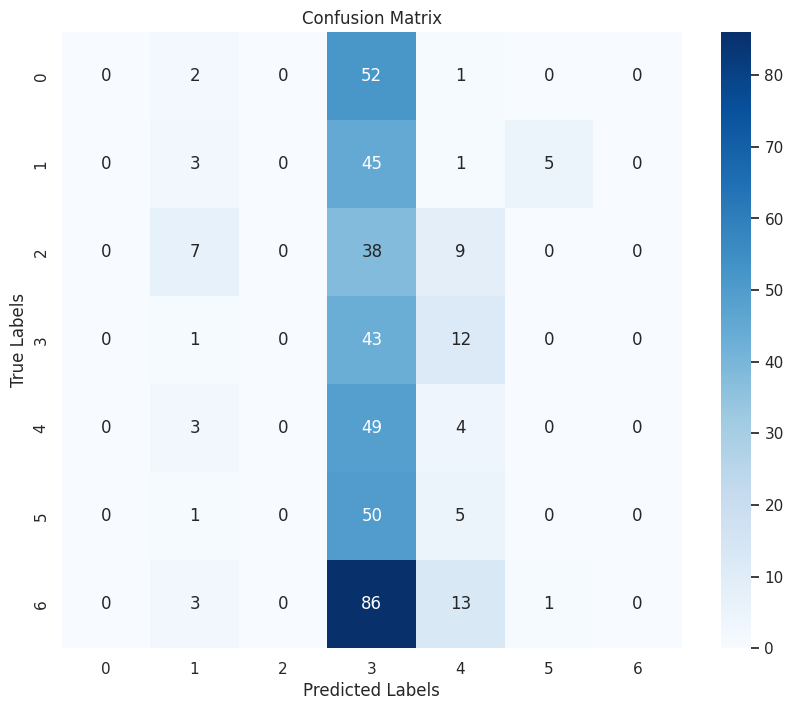

In [50]:

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


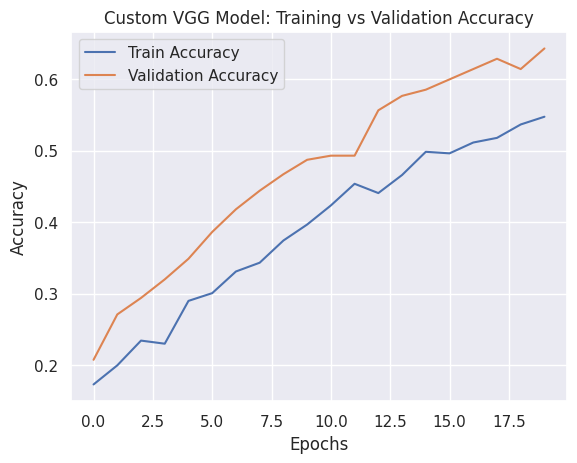

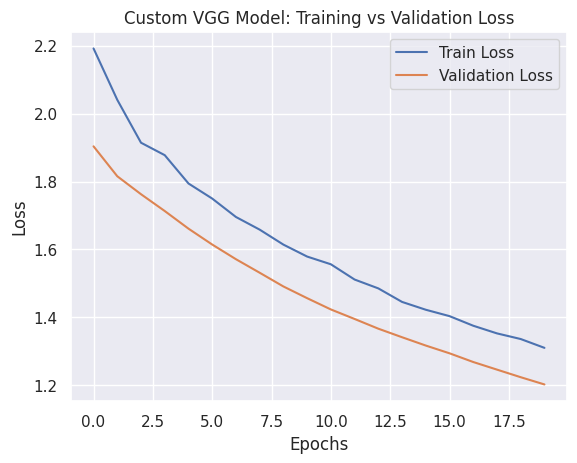

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_23 (Lambda)                   │ (None, 48, 48, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,781,255 (56.39 MB)

 Trainable params: 66,567 (260.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [52]:


# plot the training history
aiml_utils.plot_training_history(history, "Custom VGG Model: ")

# print the model summary
aiml_utils.print_model_summary(model)

In [53]:
# Save the entire model to a keras file
VGGModelFilePath = '/content/VGGModel.keras'
model.save(VGGModelFilePath)